In [455]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.regression.linear_model as sm
from scipy.stats import norm
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [456]:
data = pd.read_csv('C:/Users/abhishek/Desktop/Machine Learning (Codes and Data Files)/Data/country.csv')
data.shape

(20, 3)

In [457]:
data.head()

,Country,Corruption_Index,Gini_Index
0,Hong Kong,77,53.7
1,South Korea,53,30.2
2,China,40,46.2
3,Italy,47,32.7
4,Mongolia,38,36.5


In [458]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
Country             20 non-null object
Corruption_Index    20 non-null int64
Gini_Index          20 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 608.0+ bytes


In [459]:
df=data.drop(['Country'],1)

Question 1 Develop a simple regression model () between CPI () and GI ().What is the change in the CPI for every one unit increase in GI?

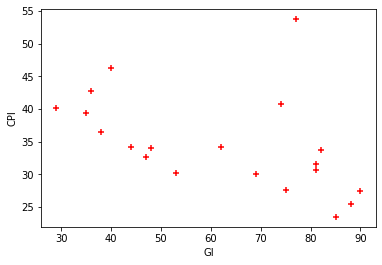

In [460]:
%matplotlib inline
plt.xlabel('GI')
plt.ylabel('CPI')
plt.scatter(df.Corruption_Index,df.Gini_Index,color='red',marker='+')

In [461]:
GI = df.drop('Corruption_Index',axis='columns')
GI.head()

,Gini_Index
0,53.7
1,30.2
2,46.2
3,32.7
4,36.5


In [462]:
CPI= df.drop('Gini_Index',axis='columns')
CPI.head()

,Corruption_Index
0,77
1,53
2,40
3,47
4,38


In [463]:
GI_X_train = GI[:-4]
GI_X_test = GI[-4:]

In [464]:
CPI_y_train = CPI[:-4]
CPI_y_test = CPI[-4:]

In [465]:
regr = linear_model.LinearRegression()
regr.fit(GI_X_train, CPI_y_train)
CPI_y_pred = regr.predict(GI_X_test)

Text(0, 0.5, 'CPI')

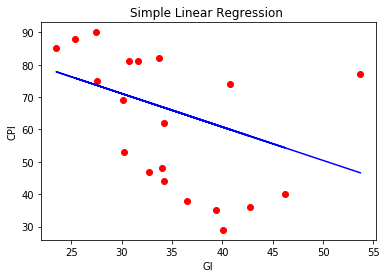

In [466]:
plt.scatter(GI,CPI, color = 'red')
plt.plot(GI, regr.predict(GI), color = 'blue')
plt.title('Simple Linear Regression ')
plt.xlabel('GI')
plt.ylabel('CPI')

In [467]:
CPI_y_pred = regr.predict(GI_X_test)

In [468]:
print('Hence Change in CPI for every one unit increase in Gi is ',regr.coef_)

Hence Change in CPI for every one unit increase in Gi is  [[-1.03302471]]


Question 2 What proportion of the variation in CPI is explained by GI? What is RMSE of the model and its significance?

In [469]:
X=np.append(arr=np.ones((16,1)).astype(int),values=GI_X_train,axis=1)
regressor_OLS=sm.OLS(endog=CPI_y_train,exog=X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Corruption_Index   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     2.959
Date:                Sun, 03 May 2020   Prob (F-statistic):              0.107
Time:                        20:48:18   Log-Likelihood:                -68.262
No. Observations:                  16   AIC:                             140.5
Df Residuals:                      14   BIC:                             142.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.0926     20.951      4.873      0.000      57.156     147.029
x1            -1.0330      0.601     -1.720      0.107      -2.321       0.255
==============================================================================
Omnibus:                        1.036   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.851
Skew:                          -0.309   Prob(JB):                        0.653
Kurtosis:                       2.054   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [470]:
print('Since value of R-sq=0.174 hence variance explained would be 17.4% '"\n"' i.e. 17.4% proportion of the variation in CPI is explained by GI' )

Since value of R-sq=0.174 hence variance explained would be 17.4% 
 i.e. 17.4% proportion of the variation in CPI is explained by GI


In [471]:
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
print('Root mean squared error: %.2f' % sqrt(mean_squared_error(CPI_y_test, CPI_y_pred)))

Coefficients:  [[-1.03302471]]
Intercept:  [102.09262216]
Root mean squared error: 22.68


In [472]:
print('The RMSE of the model is 22.68 and its significance is that it indicates the absolute fit' "\n" 'of the model to the data–how close the observed data points are to the model’s predicted values.' "\n" 'Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.')

The RMSE of the model is 22.68 and its significance is that it indicates the absolute fit
of the model to the data–how close the observed data points are to the model’s predicted values.
Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.


Question 3 Is there a statistically significant relationship between CPI and GI at alpha value of 10%?

In [473]:
print('Since P value is 0.107 slightly greater than 0.10 hence there is significant relation between CPI and GI at alpha = 10%')

Since P value is 0.107 slightly greater than 0.10 hence there is significant relation between CPI and GI at alpha = 10%


Question 4: Calculate the 95% confidence interval for the regression coefficient Is this coefficient statistically significant?

In [474]:
print(regressor_OLS.conf_int(0.05))

               0           1
const  57.156369  147.028876
x1     -2.321125    0.255076


In [475]:
print('Hence the confidence interval at alpha = 95% for the regression coefficient is [-2.321125 0.255076 ]')

Hence the confidence interval at alpha = 95% for the regression coefficient is [-2.321125 0.255076 ]


In [516]:
print('The computed regression line has equation ŷ = 102.09 + -1.03x.However, a 95% confidence interval for the slope is (-2.32, 0.255). So saying, "The rate of change of the conditional mean of Y with respect to x is estimated to be between -2.32 and 0.255" isusually1 preferable to saying, "The rate of change of the conditional mean Y with respect to x is about -1.03."')

The computed regression line has equation ŷ = 102.09 + -1.03x.However, a 95% confidence interval for the slope is (-2.32, 0.255). So saying, "The rate of change of the conditional mean of Y with respect to x is estimated to be between -2.32 and 0.255" isusually1 preferable to saying, "The rate of change of the conditional mean Y with respect to x is about -1.03."


Question 5: Check the normal distribution of residual, and homoscedasticity of the data. Show the graphical results in both the cases.

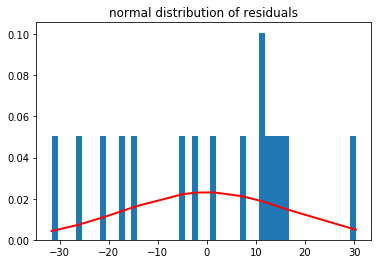

In [477]:
model=regressor_OLS
mu = np.mean(model.resid)
sigma = np.std(model.resid)
pdf = norm.pdf(sorted(model.resid), mu, sigma)
plt.hist(model.resid, bins=50, normed=True)
plt.plot(sorted(model.resid), pdf, color='red', linewidth=2)
plt.title('normal distribution of residuals')
plt.show()

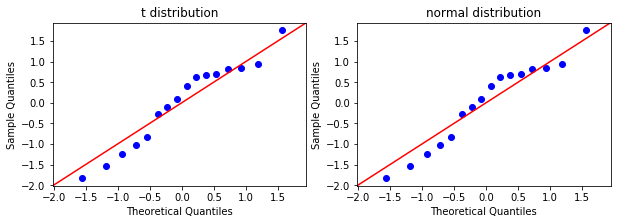

In [478]:
import statsmodels.api as smm
from scipy import stats
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,3))
smm.qqplot(model.resid, stats.t, fit=True, line='45',
ax = ax1)
ax1.set_title('t distribution')
smm.qqplot(model.resid, stats.norm, fit=True, line='45', ax=ax2)
ax2.set_title('normal distribution')
plt.show()

In [479]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 5.0)
def homoscedasticity_test(model):
'''
 Function for testing the homoscedasticity of residuals in a linear regression mode
l.
 It plots residuals and standardized residuals vs. fitted values
 Args:
 * model - fitted OLS model from statsmodels
 '''
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)
sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 're
d'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=
ax[1],
line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')
print('\n Residuals plots ----')
homoscedasticity_test(regressor_OLS)

IndentationError: expected an indented block (<ipython-input-479-734701668b51>, line 15)

Question 6: Do the outlier analysis by means of Z-score, Mahalanobis distance, Cook distance or Leverage values.

In [ ]:
z = np.abs(stats.zscore(df))
print(z)

In [510]:
threshold = 0.5
print(np.where(z > 0.5))

(array([ 0,  0,  1,  2,  2,  3,  4,  5,  5,  6,  6,  7,  8,  9,  9, 10, 10,
       11, 11, 12, 13, 13, 14, 14, 16, 17, 17, 18, 19, 19], dtype=int64), array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1], dtype=int64))


In [512]:
# The first array contains the list of row numbers and second array respective column numbers,
#which mean z[0][0] have a Z-score higher than 0.5.
print(z[0][0])

0.7613825095321992


In [513]:
print('So, the data point — 1st record on column ZN is an outlier.')

So, the data point — 1st record on column ZN is an outlier.
